[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



In [40]:
Categorical Variable: Eye Color
Quantitative Variable: Age
Discrete Variable: Number of Shoes Owned
Continuous Variable: Temperature

SyntaxError: invalid syntax (<ipython-input-40-9df73273ab60>, line 1)

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

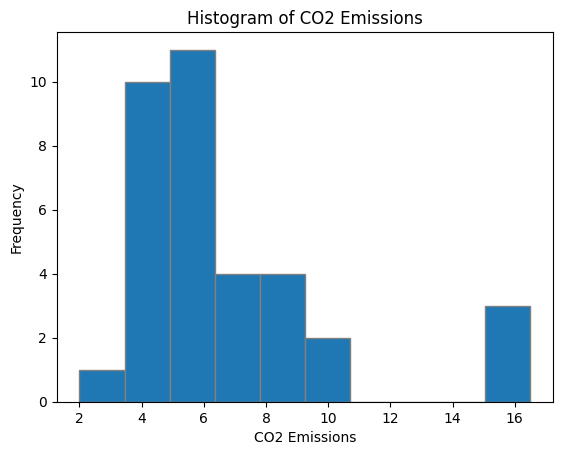

In [42]:
#function for building the Co2 historgram
plt.hist(carbon_west['CO2'], bins = 10, edgecolor = 'grey')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emissions')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [43]:
mn_CO2 = carbon_west['CO2'].mean()
md_CO2 = carbon_west['CO2'].median()
sd_CO2 = carbon_west['CO2'].std()

print(f"Mean: {mn_CO2}")
print(f"Median: {md_CO2}")
print(f"Standard Deviation: {sd_CO2}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [44]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [45]:
# exclude D.C. from the data
Murders_without_DC = murders[murders['state'] != 'DC']

# calculate mean and standard deviation for the murder rates without D.C.
mn_murders = Murders_without_DC['murder'].mean()
sd_murders = Murders_without_DC['murder'].std()

# pint mean and standard deviation
print(f"Mean: {mn_murders}")
print(f"Standard Deviation: {sd_murders}")


Mean: 4.874
Standard Deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C.

In [46]:
five_number_summary = Murders_without_DC['murder'].describe(percentiles = [.25, .5, .75])
print(five_number_summary[['min', '25%', '50%', '75%', 'max']])

min     1.000
25%     2.625
50%     4.850
75%     6.175
max    12.400
Name: murder, dtype: float64


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [47]:
#now I am going to calculate with D.C.
mean_with_DC = murders['murder'].mean()
median_with_DC = murders['murder'].median()

five_number_summary_with_DC = murders['murder'].describe(percentiles = [.25, .50, .75])

#print the goods
print(f"Mean with D.C.: {mean_with_DC}")
print(f"Median with D.C.: {median_with_DC}")
print(f"Five-Number Summary with D.C.: {five_number_summary_with_DC}")

Mean with D.C.: 5.252941176470588
Median with D.C.: 5.0
Five-Number Summary with D.C.: count    51.000000
mean      5.252941
std       3.725391
min       1.000000
25%       2.650000
50%       5.000000
75%       6.450000
max      24.200000
Name: murder, dtype: float64


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [48]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

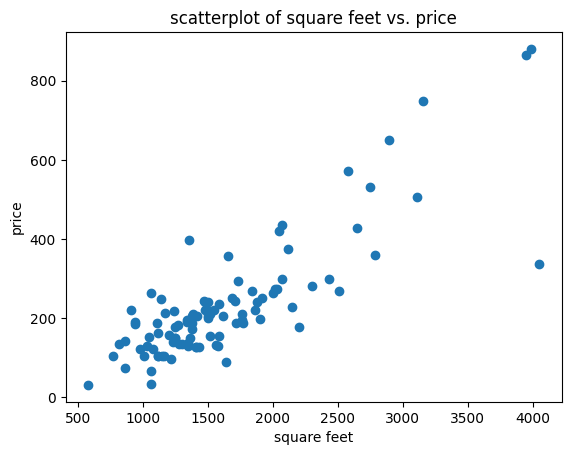

In [49]:
#scatterplot function craziness
plt.scatter(houses['size'], houses['price'])#scatterplot function construct
plt.xlabel('square feet')#labels
plt.ylabel('price')
plt.title('scatterplot of square feet vs. price')
plt.show()

Part b. Find the correlation between the two variables.

In [50]:
correlation = houses['size'].corr(houses['price'])
print(f"correlation between size and price: {correlation}")


correlation between size and price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

Text(0, 0.5, 'price')

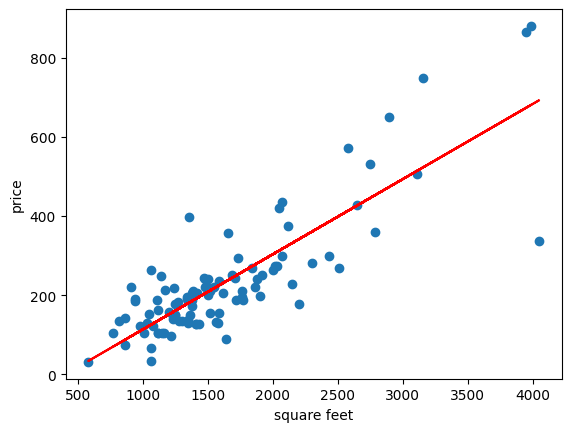

In [51]:
#allows me to fit the regression lone
slope, intercept = np.polyfit(houses['size'], houses['price'], 1)

#scatterplot with the regression line
plt.scatter(houses['size'], houses['price'])
plt.plot(houses['size'], slope * houses['size'] + intercept, color = 'red')
plt.xlabel('square feet')
plt.ylabel('price')

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

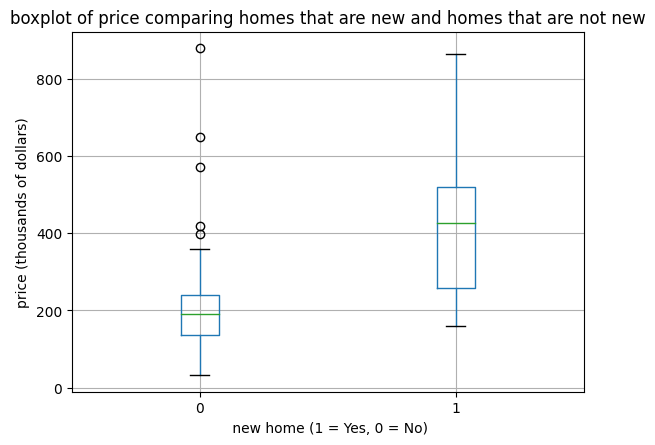

In [52]:
houses.boxplot(column = 'price', by = 'new')
plt.title('boxplot of price comparing homes that are new and homes that are not new')
plt.suptitle('')
plt.xlabel(' new home (1 = Yes, 0 = No)') #I was having trouble with this one so I used GPT to help. Reading the code practically explains that there is a boolean situation with 1 returning yes and 0 returning no. I figured I should credit how this function was made.
plt.ylabel('price (thousands of dollars)')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [53]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [54]:
#the CONTNGENTCY table func
contingentcy_table = pd.crosstab(happy['marital'], happy['happiness']) #show freq of marital status and Happiness
print(contingentcy_table) #print

happiness    1  1     1  1     2  1     3    2  2     1  2     2  2     3  \
marital                                                                     
fe         348        0        0        0  642        0        0        0   
fem          0        5        0        0    0        0        0        0   
mal          0      107       33       56    0      229      114      210   
male         0       99        0        0    0        0        0        0   

happiness    3  3     1  3     2  3     3  
marital                                    
fe         153        0        0        0  
fem          0        0        0        0  
mal          0       33       45       68  
male         0        0        0        0  
